# 1_Example

In [32]:
import pandas as pd # pip install pandas # if not owned

import matplotlib.pyplot as plt

from pathlib import Path

# change the path

USER_PATH = Path(r"C:\Users\Mateusz\Desktop\ZBIORCZE\TECH\ANALIZA DANYCH\Python\Projekty MB") # <--- here

df = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows" / "data" / "data_cleaned.csv") 

df_cast = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows" / "data" / "cast.csv") 

df_category = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows" / "data" / "category.csv") 

df_country = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows" / "data" / "country.csv") 

In [33]:
# setting indexes

df.set_index(["show_id"], inplace = True) 

df = df.sort_index()

df_cast.set_index(["show_id"], inplace = True) 

df_cast = df_cast.sort_index()

df_country.set_index(["show_id"], inplace = True) 

df_country = df_country.sort_index()

df_category.set_index(["show_id"], inplace = True) 

df_category = df_category.sort_index()

In [34]:
# top 10 directors with the most directed shows / movies

directors = df[df['director'] != "Unknown"]

directors = directors.groupby("director").agg({"title": ["count"]})

directors.sort_values(by=[('title', 'count')], ascending=False).head(10)

,title
,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12


In [38]:
# top 10 directors with the most directed shows / movies

directors = df[df['director'] != "Unknown"]

directors = directors.groupby("director").agg({"title": ["count"]})

dr = directors.sort_values(by=[('title', 'count')], ascending=False).head(10)

<Axes: xlabel='director'>

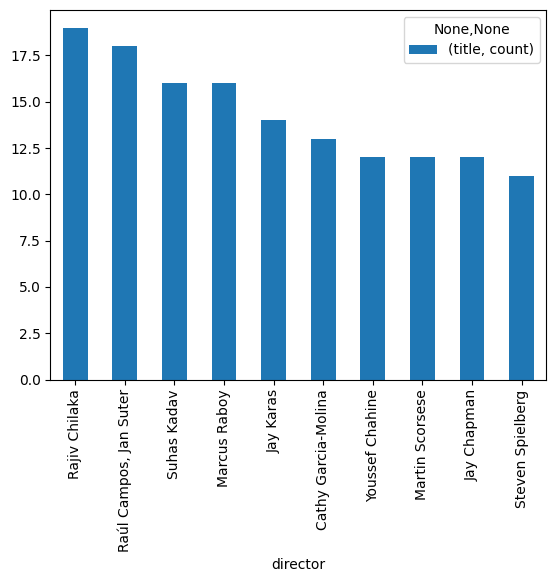

In [39]:
dr.plot(kind = 'bar')

In [37]:
#pivot table z długością filmów i seriali bez null values

# najpopulaniersi aktorzy, kraje i kategorie